In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Covid Dataset.csv')
X = df.drop('COVID-19', axis=1)
y = df['COVID-19']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**SVM**

In [ ]:
#Before Feature Selection
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('/content/drive/MyDrive/Covid Dataset.csv')
label_encoder = LabelEncoder()
data['COVID-19'] = label_encoder.fit_transform(data['COVID-19'])
categorical_columns = ['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat','Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache','Heart Disease',
                       'Diabetes', 'Hyper Tension', 'Fatigue ','Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient','Attended Large Gathering',
                       'Visited Public Exposed Places','Family working in Public Exposed Places', 'Wearing Masks','Sanitization from Market', 'COVID-19']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])
X = data.drop('COVID-19', axis=1)
y = data['COVID-19']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9733210671573137
Precision: 0.968236582694414
Recall: 1.0
F1 Score: 0.9838619922092375


In [ ]:
#After using Feature Selection
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/Covid Dataset.csv')
label_encoder = LabelEncoder()
data['COVID-19'] = label_encoder.fit_transform(data['COVID-19'])
categorical_columns = ['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat','Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache','Heart Disease',
                       'Diabetes', 'Hyper Tension', 'Fatigue ','Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient','Attended Large Gathering',
                       'Visited Public Exposed Places','Family working in Public Exposed Places', 'Wearing Masks','Sanitization from Market', 'COVID-19']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])
X = data.drop('COVID-19', axis=1)
y = data['COVID-19']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_classifier = SVC(kernel='linear', C=1)
n_features_to_select = 10
rfe = RFE(estimator=svm_classifier, n_features_to_select=n_features_to_select)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)
svm_classifier.fit(X_train_rfe, y_train)
y_pred = svm_classifier.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
selected_features = np.array(X.columns)[rfe.support_]
print("Selected Features:", selected_features)

Accuracy: 0.9733210671573137
Precision: 0.968236582694414
Recall: 1.0
F1 Score: 0.9838619922092375
Selected Features: ['Breathing Problem' 'Fever' 'Dry Cough' 'Sore throat' 'Running Nose'
 'Diabetes' 'Abroad travel' 'Contact with COVID Patient'
 'Attended Large Gathering' 'Family working in Public Exposed Places']


**K-Nearest Neighbors**

In [ ]:
#Before using Feature Selection
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
df = pd.read_csv('/content/drive/MyDrive/Covid Dataset.csv')
X = df.drop('COVID-19', axis=1)
y = df['COVID-19']
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None, labels=['No', 'Yes'])
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9760809567617296
Precision: [0.88986784 0.99883721]
Recall: 0.9717194570135747
F1 Score: 0.985091743119266


In [ ]:
#After using Feature Selection
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
df = pd.read_csv('/content/drive/MyDrive/Covid Dataset.csv')
X = df.drop('COVID-19', axis=1)
y = df['COVID-19']
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
k_best = SelectKBest(score_func=mutual_info_classif, k=17)
X_train_k_best = k_best.fit_transform(X_train, y_train)
X_test_k_best = k_best.transform(X_test)
knn_classifier.fit(X_train_k_best, y_train)
y_pred = knn_classifier.predict(X_test_k_best)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None, labels=['No', 'Yes'])
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')
print("Selected Features:", X.columns[k_best.get_support()])
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Selected Features: Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat', 'Asthma',
       'Chronic Lung Disease', 'Headache', 'Heart Disease', 'Hyper Tension',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market'],
      dtype='object')
Accuracy: 0.9770009199632015
Precision: [0.89035088 1.        ]
Recall: 0.9717194570135747
F1 Score: 0.9856569133677566


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Naive Bayes**




In [ ]:
#Befor using Feature Selection
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
df = pd.read_csv('/content/drive/MyDrive/Covid Dataset.csv')
X = df.drop('COVID-19', axis=1)
y = df['COVID-19']
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None, labels=['No', 'Yes'])
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.766329346826127
Precision: [0.44420131 1.        ]
Recall: 0.7126696832579186
F1 Score: 0.83223249669749


In [ ]:
#After using Feature selection
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
df = pd.read_csv('/content/drive/MyDrive/Covid Dataset.csv')
X = df.drop('COVID-19', axis=1)
y = df['COVID-19']
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
k_best = SelectKBest(score_func=chi2, k=7)
X_train_k_best = k_best.fit_transform(X_train, y_train)
X_test_k_best = k_best.transform(X_test)
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_k_best, y_train)
y_pred = naive_bayes_classifier.predict(X_test_k_best)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None, labels=['No', 'Yes'])
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')
print("Selected Features:", X.columns[k_best.get_support()])
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Selected Features: Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering'],
      dtype='object')
Accuracy: 0.7939282428702852
Precision: [0.47540984 1.        ]
Recall: 0.746606334841629
F1 Score: 0.8549222797927462


**Logistic Regression**

In [ ]:
#Before using Feature Selection
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
df = pd.read_csv('/content/drive/MyDrive/Covid Dataset.csv')
X = df.drop('COVID-19', axis=1)
y = df['COVID-19']
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
logistic_regression_classifier = LogisticRegression(max_iter=1000)
logistic_regression_classifier.fit(X_train, y_train)
y_pred = logistic_regression_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None, labels=['No', 'Yes'])
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9724011039558418
Precision: [0.95767196 0.97550111]
Recall: 0.9909502262443439
F1 Score: 0.9831649831649832


In [ ]:
#After using Feature selection strategie
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
df = pd.read_csv('/content/drive/MyDrive/Covid Dataset.csv')
X = df.drop('COVID-19', axis=1)
y = df['COVID-19']
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
logistic_regression_classifier = LogisticRegression(max_iter=1000)
n_features_to_select = 10
rfe = RFE(estimator=logistic_regression_classifier, n_features_to_select=n_features_to_select)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)
logistic_regression_classifier.fit(X_train_rfe, y_train)
y_pred = logistic_regression_classifier.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None, labels=['No', 'Yes'])
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')
print("Selected Features:", X.columns[rfe.support_])
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Selected Features: Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places'],
      dtype='object')
Accuracy: 0.9751609935602575
Precision: [0.94444444 0.98200225]
Recall: 0.9875565610859729
F1 Score: 0.9847715736040609


**Random Forest Classifier**

In [ ]:
#Before using Feature selsction
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('/content/drive/MyDrive/Covid Dataset.csv')
X = df.drop('COVID-19', axis=1)
y = df['COVID-19']
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=40)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None, labels=['No', 'Yes'])
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9797608095676172
Precision: [0.92857143 0.99411072]
Recall: 0.9802555168408827
F1 Score: 0.9871345029239766


In [ ]:
#After using Feature Selection
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('/content/drive/MyDrive/Covid Dataset.csv')
X = df.drop('COVID-19', axis=1)
y = df['COVID-19']
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
feature_importances = clf.feature_importances_
n_top_features = 15
top_feature_indices = feature_importances.argsort()[::-1][:n_top_features]
X_train_top = X_train.iloc[:, top_feature_indices]
X_test_top = X_test.iloc[:, top_feature_indices]
clf.fit(X_train_top, y_train)
y_pred = clf.predict(X_test_top)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None, labels=['No', 'Yes'])
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')
print("Selected Features:", X.columns[top_feature_indices])
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Selected Features: Index(['Breathing Problem', 'Abroad travel', 'Sore throat', 'Dry Cough',
       'Attended Large Gathering', 'Fever', 'Contact with COVID Patient',
       'Family working in Public Exposed Places', 'Running Nose',
       'Visited Public Exposed Places', 'Heart Disease', 'Asthma',
       'Hyper Tension', 'Chronic Lung Disease', 'Gastrointestinal '],
      dtype='object')
Accuracy: 0.984360625574977
Precision: [0.94285714 0.99429875]
Recall: 0.9864253393665159
F1 Score: 0.9903463940942647


**visualising the data**

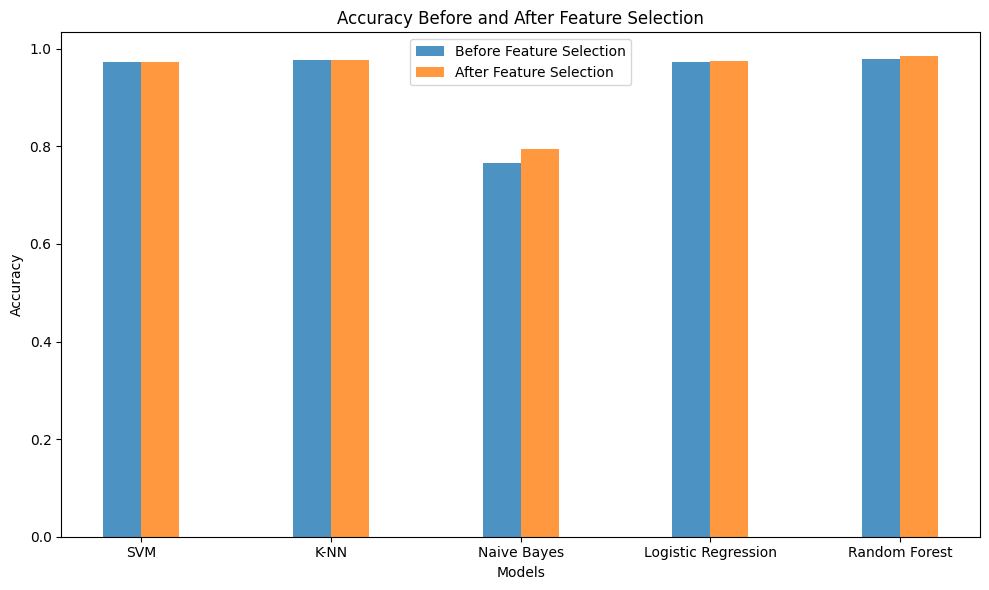

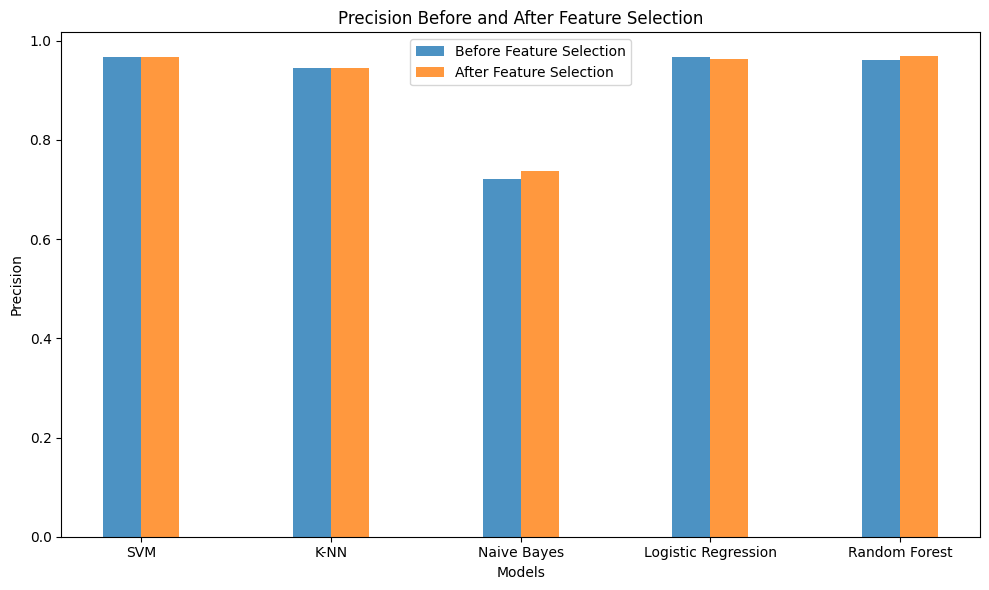

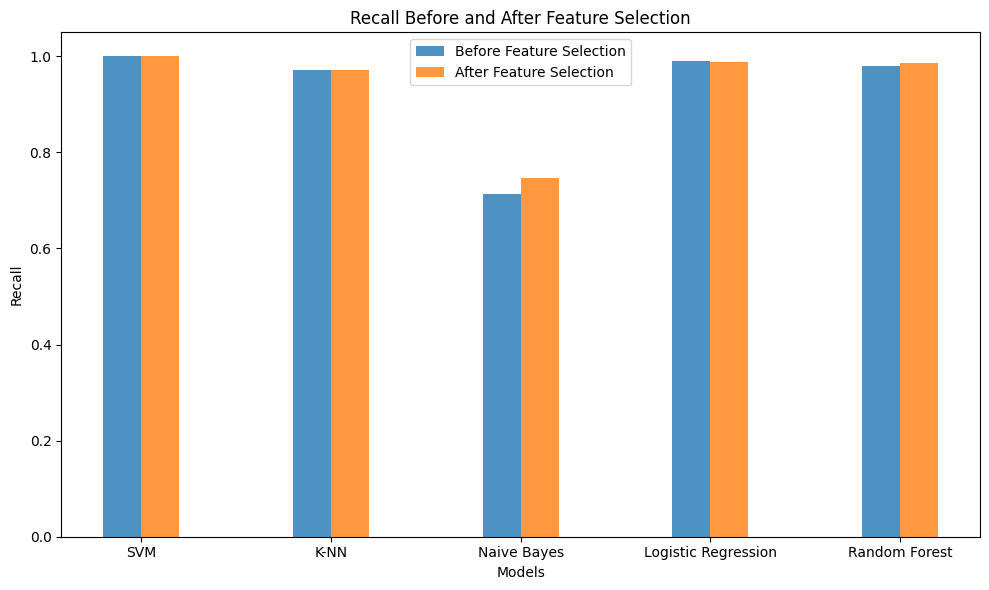

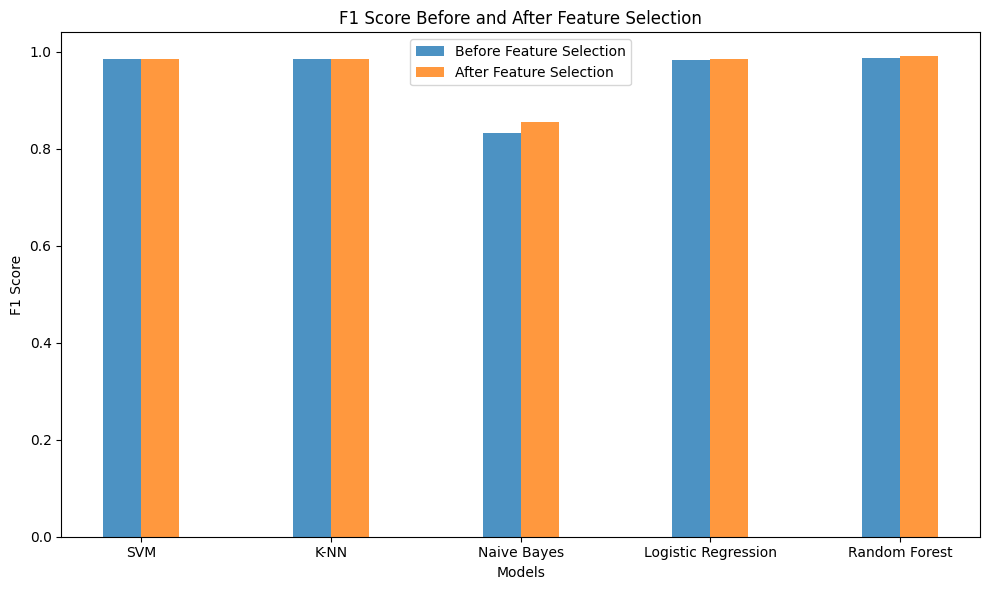

In [ ]:
#Bar plot
import matplotlib.pyplot as plt
import numpy as np
models = ['SVM', 'K-NN', 'Naive Bayes', 'Logistic Regression', 'Random Forest']
metrics_before = {
    'Accuracy': [0.9733, 0.9761, 0.7663, 0.9724, 0.9798],
    'Precision': [0.9682, np.mean([0.8899, 0.9988]), np.mean([0.4442, 1.0]), np.mean([0.9577, 0.9755]), np.mean([0.9286, 0.9941])],
    'Recall': [1.0, 0.9717, 0.7127, 0.9910, 0.9803],
    'F1 Score': [0.9839, 0.9851, 0.8322, 0.9832, 0.9871]
}
metrics_after = {
    'Accuracy': [0.9733, 0.9770, 0.7939, 0.9752, 0.9844],
    'Precision': [0.9682, np.mean([0.8904, 1.0]), np.mean([0.4754, 1.0]), np.mean([0.9444, 0.9820]), np.mean([0.9429, 0.9943])],
    'Recall': [1.0, 0.9717, 0.7466, 0.9876, 0.9864],
    'F1 Score': [0.9839, 0.9857, 0.8549, 0.9848, 0.9903]
}
bar_width = 0.2
index = np.arange(len(models))
for i, metric in enumerate(metrics_before.keys()):
    plt.figure(figsize=(10, 6))
    plt.bar(index - bar_width / 2, metrics_before[metric], bar_width, label='Before Feature Selection', alpha=0.8)
    plt.bar(index + bar_width / 2, metrics_after[metric], bar_width, label='After Feature Selection', alpha=0.8)
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.title(f'{metric} Before and After Feature Selection')
    plt.xticks(index, models)
    plt.legend()
    plt.tight_layout()
    plt.show()

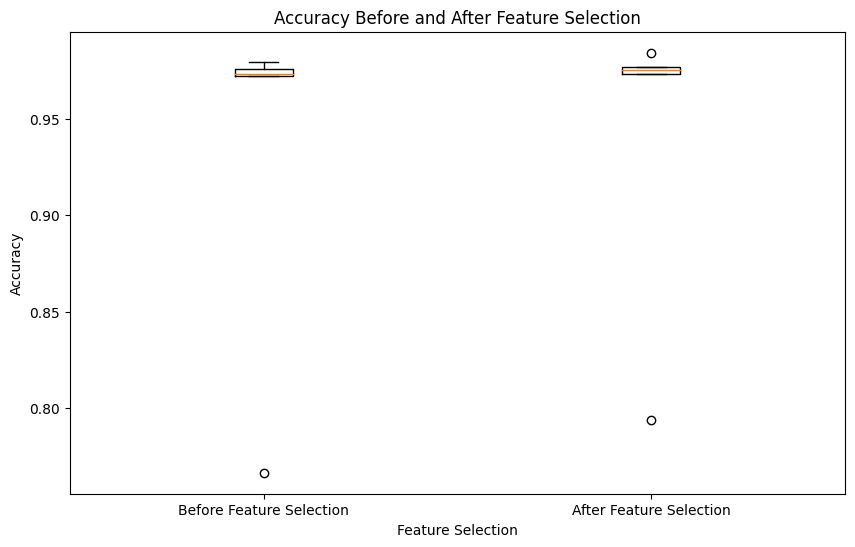

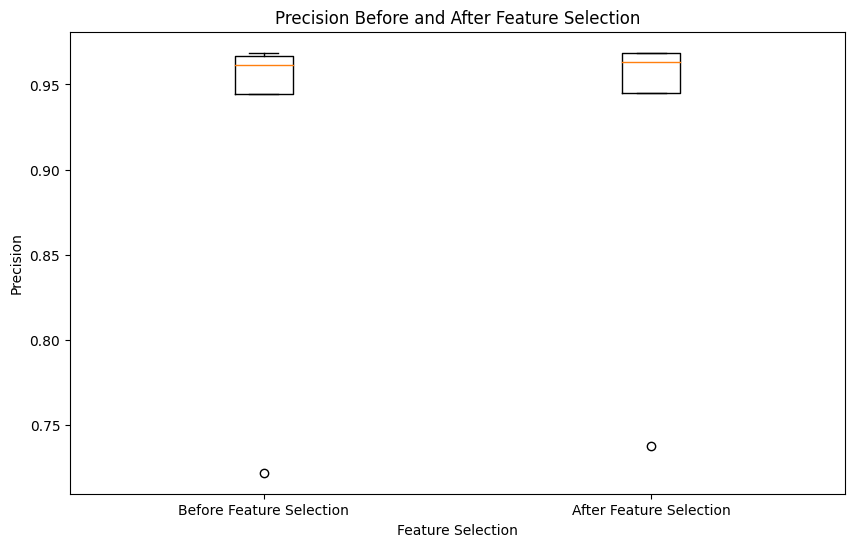

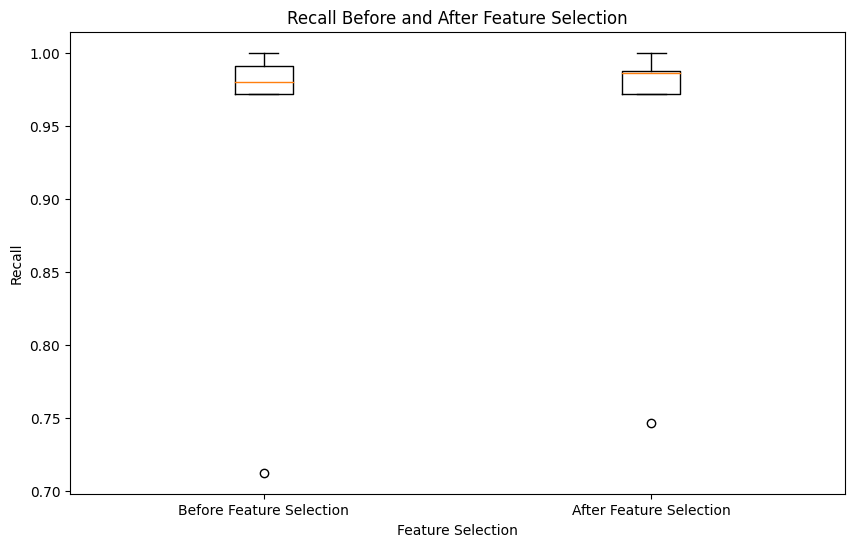

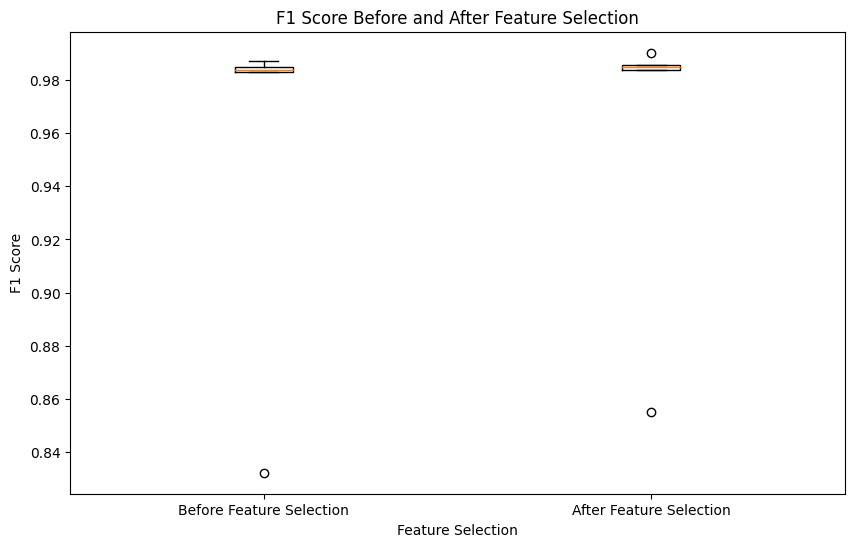

In [ ]:
#Box plot
import matplotlib.pyplot as plt
import numpy as np
models = ['SVM', 'K-NN', 'Naive Bayes', 'Logistic Regression', 'Random Forest']
metrics_before = {
    'Accuracy': [0.9733, 0.9761, 0.7663, 0.9724, 0.9798],
    'Precision': [0.9682, np.mean([0.8899, 0.9988]), np.mean([0.4442, 1.0]), np.mean([0.9577, 0.9755]), np.mean([0.9286, 0.9941])],
    'Recall': [1.0, 0.9717, 0.7127, 0.9910, 0.9803],
    'F1 Score': [0.9839, 0.9851, 0.8322, 0.9832, 0.9871]
}
metrics_after = {
    'Accuracy': [0.9733, 0.9770, 0.7939, 0.9752, 0.9844],
    'Precision': [0.9682, np.mean([0.8904, 1.0]), np.mean([0.4754, 1.0]), np.mean([0.9444, 0.9820]), np.mean([0.9429, 0.9943])],
    'Recall': [1.0, 0.9717, 0.7466, 0.9876, 0.9864],
    'F1 Score': [0.9839, 0.9857, 0.8549, 0.9848, 0.9903]
}
metric_names = list(metrics_before.keys())
for metric_name in metric_names:
    plt.figure(figsize=(10, 6))
    data_before = metrics_before[metric_name]
    data_after = metrics_after[metric_name]
    data = [data_before, data_after]
    labels = ['Before Feature Selection', 'After Feature Selection']
    plt.boxplot(data, labels=labels)
    plt.title(f'{metric_name} Before and After Feature Selection')
    plt.xlabel('Feature Selection')
    plt.ylabel(metric_name)
    plt.show()

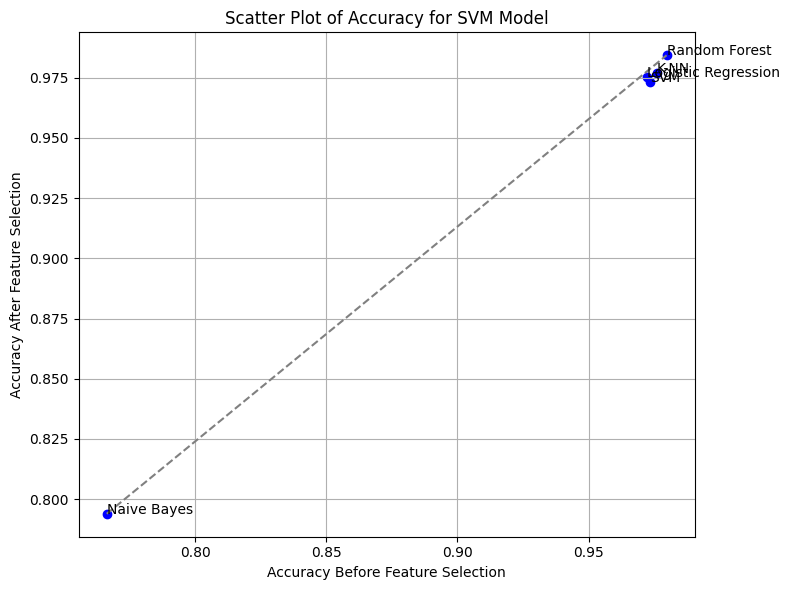

In [ ]:
#Scatter Plot
import matplotlib.pyplot as plt
import numpy as np
models = ['SVM', 'K-NN', 'Naive Bayes', 'Logistic Regression', 'Random Forest']
accuracy_before = [0.973321067, 0.976080957, 0.766329347, 0.972401104, 0.97976081]
accuracy_after = [0.973321067, 0.97700092, 0.793928243, 0.975160994, 0.984360626]
plt.figure(figsize=(8, 6))
plt.scatter(accuracy_before, accuracy_after, marker='o', color='b')
plt.xlabel('Accuracy Before Feature Selection')
plt.ylabel('Accuracy After Feature Selection')
plt.title('Scatter Plot of Accuracy for SVM Model')
plt.plot([min(accuracy_before), max(accuracy_before)], [min(accuracy_after), max(accuracy_after)], color='gray', linestyle='--')
for i, model in enumerate(models):
    plt.annotate(model, (accuracy_before[i], accuracy_after[i]))
plt.grid()
plt.tight_layout()
plt.show()

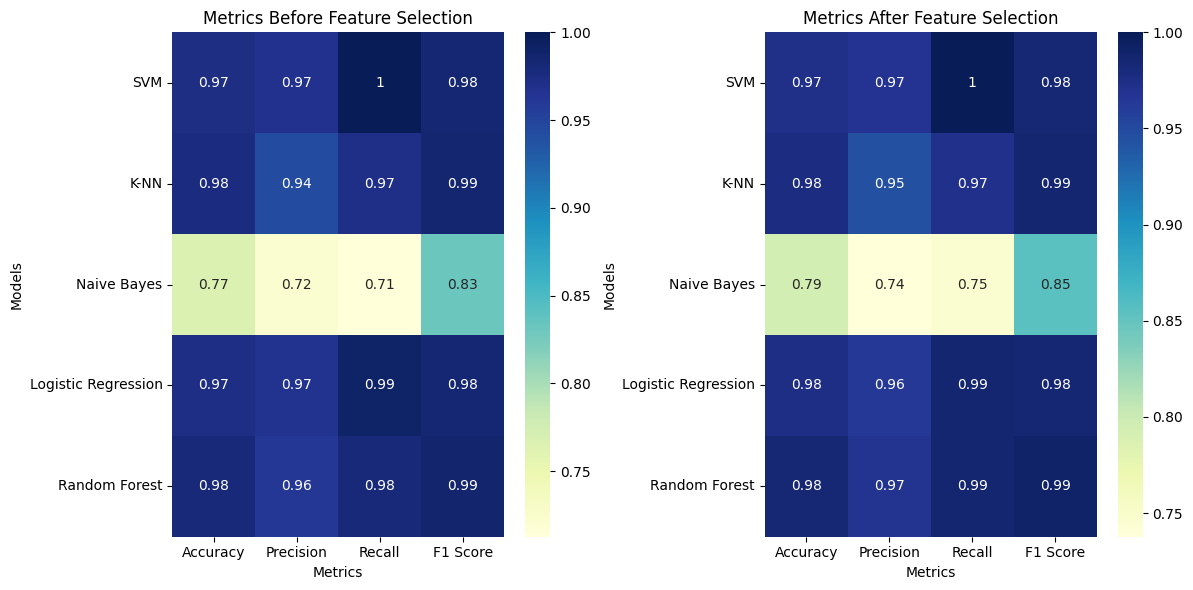

In [ ]:
#Heat Map
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
models = ['SVM', 'K-NN', 'Naive Bayes', 'Logistic Regression', 'Random Forest']
metrics_before = {
    'Accuracy': [0.9733, 0.9761, 0.7663, 0.9724, 0.9798],
    'Precision': [0.9682, np.mean([0.8899, 0.9988]), np.mean([0.4442, 1.0]), np.mean([0.9577, 0.9755]), np.mean([0.9286, 0.9941])],
    'Recall': [1.0, 0.9717, 0.7127, 0.9910, 0.9803],
    'F1 Score': [0.9839, 0.9851, 0.8322, 0.9832, 0.9871]
}
metrics_after = {
    'Accuracy': [0.9733, 0.9770, 0.7939, 0.9752, 0.9844],
    'Precision': [0.9682, np.mean([0.8904, 1.0]), np.mean([0.4754, 1.0]), np.mean([0.9444, 0.9820]), np.mean([0.9429, 0.9943])],
    'Recall': [1.0, 0.9717, 0.7466, 0.9876, 0.9864],
    'F1 Score': [0.9839, 0.9857, 0.8549, 0.9848, 0.9903]
}
df_before = pd.DataFrame(metrics_before, index=models)
df_after = pd.DataFrame(metrics_after, index=models)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(df_before, annot=True, cmap='YlGnBu', ax=axes[0], cbar=True)
axes[0].set_title('Metrics Before Feature Selection')
axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('Models')
sns.heatmap(df_after, annot=True, cmap='YlGnBu', ax=axes[1], cbar=True)
axes[1].set_title('Metrics After Feature Selection')
axes[1].set_xlabel('Metrics')
axes[1].set_ylabel('Models')
plt.tight_layout()
# Show the plot
plt.show()